
#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q\right)^3 &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






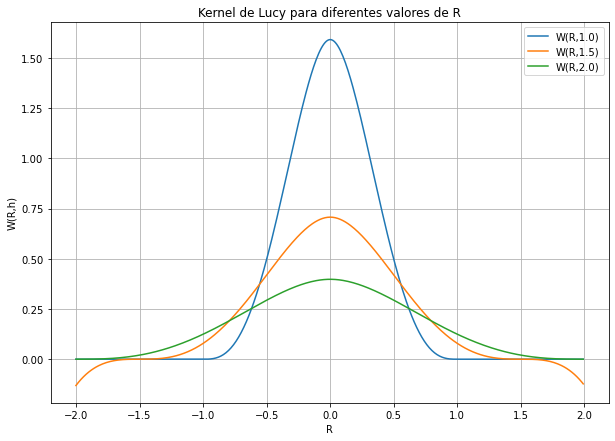

In [2]:
#Importar librerias
import numpy as np
import pylab as plt
import scipy as sp
import sympy
#Inicializar variables
h=1
#Definimos la función con la variable r como una variable asignada anteriormente
def W(r):
    r=float(abs(r))
    q=(r/h)
    A2D=5/(np.pi*(h**2))
    if 0<=q and q<h: 
        j=(1+(3*q))*((1-q)**3)*(A2D)
    else:
        j=0
    return j
#Vamos a realizar varios gráficos de la función W(r) de [0,10] para diferentes valores de h
plt.figure(figsize=(10,7))
for i in np.linspace(1,2,3):
    h=i
    x=np.arange(-2,2,0.01)
    y=np.zeros(len(x))
    for i in range(len(x)):
        y[i]=W(x[i])
    m=str(h)
    plt.plot(x,y,label="W(R,"+m+")")
plt.legend()
plt.title("Kernel de Lucy para diferentes valores de R")
plt.grid()
plt.xlabel("R")
plt.ylabel("W(R,h)")
plt.show()

Ahora, vamos a utilizar la librería Sympy para hallar la derivada de nuestra función W.
Como R es un parámetro fijo, derivar con respecto a h como si fuera una función de una variable:

In [3]:
h,R=sympy.symbols("h R")
q=R/h
k=sympy.diff((1+3*q)*(1-q)**3*(5/(np.pi*h**2)),R)
print("Para 0<q<h, W(R,h):")
display((1+3*q)*(1-q)**3)
print("Derivando esta expresión respecto a R nos queda:")
display(k)
print("Podemos usar lambdify para crear nuestra nueva función de R, que sea la derivada y después comparar valores")
g=sympy.lambdify([h,R],k)
g(1,2)

Para 0<q<h, W(R,h):


(-R/h + 1)**3*(3*R/h + 1)

Derivando esta expresión respecto a R nos queda:


4.77464829275686*(-R/h + 1)**3/h**3 - 4.77464829275686*(-R/h + 1)**2*(3*R/h + 1)/h**3

Podemos usar lambdify para crear nuestra nueva función de R, que sea la derivada y después comparar valores


-38.19718634205488

Ahora, comparemos las gráficas de la derivada hallada analíticamente (librería SymPy), y numéricamente.
Para hallar la derivada numérica, vamos a usar el método de diferencias centrales con la librería Scipy.

Para esta comparación usaremos R=1

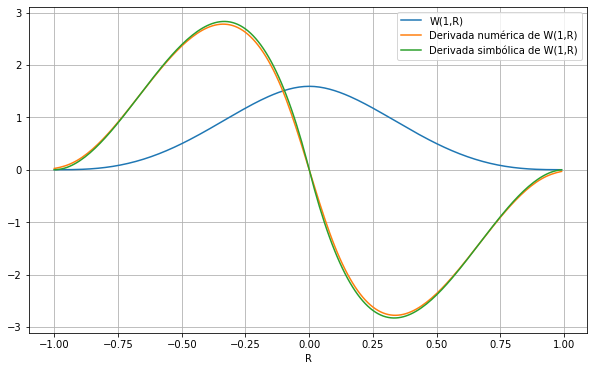

In [4]:
from scipy.misc import derivative
h=1
h1=lambda x: derivative(W,x,0.09)
x1=np.arange(-1,1,0.01)
y1=np.zeros(len(x1))
z1=np.zeros(len(x1))
k1=np.zeros(len(x1))
for i in range(len(x1)):
    y1[i]=W(x1[i])  #Función
    z1[i]=h1(x1[i]) #Derivada numérica
    if x1[i]<0:
        k1[i]=-g(1,abs(x1[i])) #Derivada simbólica
    else:
        k1[i]=g(1,x1[i])
plt.figure(figsize=(10,6))
plt.plot(x1,y1,label="W(1,R)")
plt.plot(x1,z1,label="Derivada numérica de W(1,R)")
plt.plot(x1,k1,label="Derivada simbólica de W(1,R)")
plt.xlabel("R")
plt.grid()
plt.legend()
plt.show()

La derivada simbólica sólo sirve en cierto intervalo debido a que $W(h,R)$ es una función a tramos, en el intervalo correcto, la derivada numérica y la derivada simbólica se solapan bien, y la derivada simbólica podría alcanzar una mejor precisión si se varían los parámetros de la función derivate de scipy. (Yo puse un epsilon arbitrario para que no se solaparan completamente para que ambas derivadas se pudieran apreciar en la gráfica)




# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

## Trapecio:

Primero debemos dividir el intervalo [a,b] en n puntos, para así calcular el área del trapecio, por lo que cada sub intervalo va a estar dado por $a+i\Delta x$, donde $\Delta x$= $\frac{b-a}{n}$. Luego, debemos ver que el área del trapecio que generan los puntos $a+i\Delta x$,  $a+i_{+1}\Delta x$, $f(a+i\Delta x)$ y $f(a+i_{+1}\Delta x)$ de una función f, está dado por la siguiente regla:
$$A=(a+i\Delta x)(f(a+i\Delta x))+\frac{(f(a+i_{+1}\Delta x)-f(a+i\Delta x))(a+i\Delta x)}{2} $$

$$A=(a+i\Delta x)(f(a+i\Delta x)+\frac{f(a+i_{+1}\Delta x)}{2}-\frac{f(a+i\Delta x)}{2})$$

$$A=(a+i\Delta x)(\frac{f(a+i\Delta x)}{2}+\frac{f(a+i_{+1}\Delta x)}{2})$$

$$A=(a+i\Delta x)\frac{f(a+i\Delta x+f(a+i_{+1}\Delta x))}{2}$$

Teniendo esta expresión, bastaría con sumar cada trapecio del intervalo [a,b] para aproximar la integral de f(x).

$$\int_{a}^{b} f(x)\,dx \approx \sum_{i=0}^{n} (a+i\Delta x)\frac{f(a+i\Delta x)+f(a+i_{+1}\Delta x)}{2} $$

## Simpson:

Para este método, como en el anterior, debemos partir el intervalo [a,b] en n nuevos sub intervalos con $\Delta x=\frac{b-a}{n}$. La idea de este método es usar una interpolación de lagrange cada 3 puntos de nuestro nuevo sub intervalo para integrar ese polinomio que nos queda con las reglas de integración que sabemos de los polinomios.

Sea P(x) un polinomio que pase por los puntos $a+i\Delta x,a+i_{+1}\Delta x,a+i_{+2}\Delta x$ tiene la forma:

$$P_{2}(x)=\frac{(x-a+i_{+1}\Delta x)(x-a+i_{+2}\Delta x)}{(a+i\Delta x-a+i_{+1}\Delta x)(a+i\Delta x-a+i_{+2}\Delta x)}f(a+i\Delta x)+\frac{(x-a+i\Delta x)(x-a+i_{+2}\Delta x)}{(a+i_{+1}\Delta x-a+i\Delta x)(a+i_{+1}\Delta x-a+i_{+2}\Delta x)}f(a+i_{+1}\Delta x)+\frac{(x-a+i_{+1}\Delta x)(x-a+i_{+2}\Delta x)}{(a+i_{+2}\Delta x-a+i_{+1}\Delta x)(a+i_{+2}\Delta x-a+i\Delta x)}f(a+i_{+2}\Delta x)$$

Que es bastante engorrosa, pero básicamente es una interpolación de lagrange para los tres puntos. Ahora, con esta expresión un poco más simplificada vamos a llegar a que el área bajo esa interpolación, o sea, la integral de $P_{2}(x)$ es:

$$A=\frac{h}{3}(f(a+i\Delta x)+4f(a+i_{+1}\Delta x)+f(a+i_{+2}\Delta x)$$
Con h:$$ h=\frac{a+i_{+2}\Delta x-a+i\Delta x}{2}$$

Así, por último, la integral de f(x):

$$\int_{a}^{b}f(x)\,dx \approx \frac{h}{3}[f(a)+2\sum_{i=1}^{\frac{n}{2}-1} f(x_{2i})+\sum_{i=1}^{2n} f(x_{2i-1})+f(b)]$$

Ahora procedemos a usar estos métodos para aproximar las integrales propuestas con el error exigido.

Podemos notar que con desigualdades de Taylor se puede calcular el error depende de la cantidad de separaciones que se tomen para cada método, (las expresiones del error están en internet o en libros de análisis numérico). Scipy tiene en sus funciones un argumento que nos permite elegir cuántos intervalos tomar o en su defecto, qué precisión se quiere.

Empecemos por definir la función $e^{1-\sqrt{x}}$ para luego integrarla con los diferentes métodos:

In [5]:
#llamamos la librería deseada
from scipy import integrate
#Definimos la función a integrar
f=lambda x: np.exp(1-(x**(1/2)))
#Llamamos la función
a=sp.integrate.quad(f,0,np.pi)
x=np.linspace(0,np.pi,100000)
b=sp.integrate.simpson(f(x),x)
c=sp.integrate.trapezoid(f(x),x)
print("Para el método de quadratura, el valor encontrado es",a[0])
print("Para el método de Simpson es:",b)
print("Y para el método Trapezoidal es de:",c)

Para el método de quadratura, el valor encontrado es 2.875491135437586
Para el método de Simpson es: 2.8754911950557434
Y para el método Trapezoidal es de: 2.87549123482166


Sigamos con $f(x)=\frac{1}{\sqrt{tan(x)}}$:

In [6]:
#Definimos la función:
g=lambda x:1/((np.tan(x))**0.5)
#Método de quadratura:
a=sp.integrate.quad(g,0,np.pi/2)
#Método de Simpson:
x=np.linspace(13e-7,np.pi/2,100001)
b=sp.integrate.simpson(g(x),x)
#Método Trapezoidal:
c=sp.integrate.trapezoid(g(x),x)
print("Para el método de quadratura, el valor encontrado es",a)
print("Para el método de Simpson es:",b)
print("Y para el método Trapezoidal es de:",c)

Para el método de quadratura, el valor encontrado es (2.221441469079176, 4.1407366424550673e-10)
Para el método de Simpson es: 2.220590389129915
Y para el método Trapezoidal es de: 2.2221264633596576


Para este método es complicado usar los métodos de simpson y trapezoidal en el intervalo ya que en f(0) la función diverge.
Para el método de quadratura es una ventaja ya que usa el valor promedio de dos puntos en el intervalo, por lo que no tiene el problema de divergencia en f(0)

Ahora veamos la integral  $$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

Como no podemos crear un intervalo en python que contenga números desde $[-\infty,\infty]$, debemos usar un truco algebráico para cambiar el intervalo de integración.

En el caso del intevalo $[-\infty,\infty]$, se puede usar el mapeo $x=t/(1−t^2)$, que da,

$$
\int_{-\infty}^{\infty}f(x)\,dx = \int_{-1}^{1}f\left(\frac{t}{1-t^2}\right)\frac{1+t^2}{(1-t^2)^2}\,dt.
$$

Ahora la integral que debemos hallar es:

$$\int_{-1}^{1}\frac{1}{1+(\frac{1}{1-t^2})^2} \frac{1+t^2}{(1-t^2)^2} dt$$

Que al simplificar nos da:


$$\int_{-1}^{1}\frac{1+t^2}{t^4-t^2+1} dt$$

In [7]:
#Definimos la función:
m=lambda x: (1+x**2)/(x**4-x**2+1)
#Método de quadratura:
a=sp.integrate.quad(m,-1,1)
#Método de Simpson:
x=np.linspace(-1,1,1000)
b=sp.integrate.simpson(m(x),x)
#Método trapezoidal
c=sp.integrate.trapezoid(m(x),x)
print("Para el método de quadratura, el valor encontrado es",a)
print("Para el método de Simpson es:",b)
print("Y para el método Trapezoidal es de:",c)

Para el método de quadratura, el valor encontrado es (3.141592653589793, 1.4956987916192829e-09)
Para el método de Simpson es: 3.141592646867784
Y para el método Trapezoidal es de: 3.141591317582575


Sigamos con la integral $\int_{e}^{2e} \frac{1}{ln(x)}dx$

In [8]:
#Definimos la función:
t1=lambda x: 1/np.log(x)
a=sp.integrate.quad(t1,np.e,2*np.e)
#Método de Simpson:
x=np.linspace(np.e,2*np.e,1000)
b=sp.integrate.simpson(t1(x),x)
#Método trapezoidal
c=sp.integrate.trapezoid(t1(x),x)
print("Para el método de quadratura, el valor encontrado es",a)
print("Para el método de Simpson es:",b)
print("Y para el método Trapezoidal es de:",c)

Para el método de quadratura, el valor encontrado es (2.0038105616240243, 2.2246766225020577e-14)
Para el método de Simpson es: 2.0038105619858713
Y para el método Trapezoidal es de: 2.003810749013251


5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

Definiendo $z=\frac{x}{R}$, tenemos que $dz=\frac{dx}{R}$.

Así, la nueva integral nos quedaría:
 $$2gR\int_{R}^{\infty}\frac{1}{\frac{x^2}{R^2}}\frac{dx}{R}=2gR^2\int_{R}^{\infty}\frac{1}{x^2}\,dx$$
 
Donde R es el radio terrestre en km R=6378 

Usemos el método de Quadratura:

In [9]:
i=sp.integrate.quad(lambda x:1/x**2,6378,np.inf)
i,

((0.00015678896205820037, 5.112118288161055e-09),)

De antemano sabemos que la integral da $\frac{1}{R}$ si lo hacemos analíticamente. Luego, teniendo este valor de la integral, el valor sería $\sqrt{2gR}$, que es: $\sqrt{2gR}\approx11.19 \frac{km}{s}$.

Ahora veamos cuánto nos da numéricamente:

In [10]:
#Radio de la tierra en km
R=6378
#Gravedad en m/s^2
g=0.0098
v=(2*g*R**2*i[0])**0.5
print("El valor encontrado numéricamente es:",v,"en km/s")

El valor encontrado numéricamente es: 11.18073342857705 en km/s



6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

Definamos las funciones que vamos a utilizar:

In [73]:
##Trapezio
def trap(f,a,b,n):
    Δx=(b-a)/n
    S=(f(a)+f(b))/2.
    for i in range(1,n):
        S=S+f(a+i*Δx) 
    return S*Δx

##Simpson
def simp(f,a,b,n):
    Δx=(b-a)/n
    suma=0
    for i in range(1,n):
        x=a+i*Δx
        if(i%2==0):
            suma=suma+2*f(x)
        else:
            suma=suma+4*f(x)
    suma=suma+f(a)+f(b)
    rest=suma*(Δx/3)
    return (rest)
simp(lambda x: np.exp(-x),0,1,80),(1-np.exp(-1))

(0.6321205589142929, 0.6321205588285577)

Ahora hagamos una gráfica de cómo se comporta el error para n=[2,10,20,40,80,160] con el método de Simpson

In [74]:
a=0
b=1
f=lambda x: np.exp(-x)
g=[2,10,20,40,80,160]
h=[]

for i in g:
    h.append(simp(f,a,b,i))
for i in range(len(g)):
    print("El error para",g[i],"iteraciones es de:",h[i]-(1-np.exp(-1)))

El error para 2 iteraciones es de: 0.00021312117510496886
El error para 10 iteraciones es de: 3.5076045756810004e-07
El error para 20 iteraciones es de: 2.1942099803773374e-08
El error para 40 iteraciones es de: 1.3716870972402262e-09
El error para 80 iteraciones es de: 8.573519671983831e-11
El error para 160 iteraciones es de: 5.358713472958243e-12


Ahora con el método del trapecio:

In [75]:
a=0
b=1
f=lambda x: np.exp(-x)
g=[2,10,20,40,80,160]
h=[]

for i in g:
    h.append(trap(f,a,b,i))
for i in range(len(g)):
    print("El error para",g[i],"iteraciones es de:",abs(h[i]-(1-np.exp(-1))))

El error para 2 iteraciones es de: 0.01311463132061963
El error para 10 iteraciones es de: 0.0005266793587332952
El error para 20 iteraciones es de: 0.00013168629625837092
El error para 40 iteraciones es de: 3.2922602829943415e-05
El error para 80 iteraciones es de: 8.230715008772371e-06
El error para 160 iteraciones es de: 2.0576827712837087e-06
